# Abtastung und Aliasing bei einem Tonsignal
Ein Sinussignal $s(t)=sin(2\pi f t)$ (im Plot blau) wird abgetastet zu $s[k]=sin(2 \pi f\cdot k\cdot T_s)$ mit Abtastzeit $T_s = 1/f_s$. $f$ und $f_s$ sind einstellbar. Der wiedergegebene Ton wird in rot dargestellt. Gezeigt sind die ersten sieben Perioden von $s(t)$. Ist "Autoplay" gesetzt, wird bei jeder Änderung von $f$ und $f_s$ der Ton abgespielt, sonst nur bei Drücken der Play-Taste.

Bei Verletzung des Nyquist-Kriteriums kommt es zu Aliasing. 

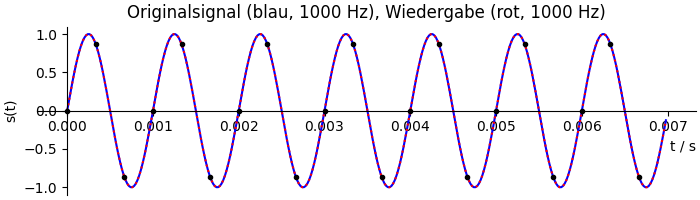

Output()

In [8]:
# (c) Benno Dömer, HS Pforzheim 2024
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt

%matplotlib widget 

import numpy as np
from numpy import (pi, sin, arange, remainder) 
import matplotlib.pyplot as plt
from IPython.display import Audio
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

figs, axs = plt.subplots(1,1,figsize=(7, 2), dpi=100, layout='constrained',num='Signal')

def plotdata(f0, fs, autopl): # wird bei Interaktion aufgerufen
    f_basis = remainder(f0,fs)
    if(f_basis < fs/2): # kein Aliasing
        f_alias = f_basis;
    else:
        f_alias = f_basis - fs;

    t = np.arange(0,1,1/fs)
    sig = np.sin(2*pi*f0*t)
    
    axs.cla()
    nper = 7
    end_idx = round(nper/f0*fs)
    t_cont = arange(0,nper/f0,1/(f0*50))
    axs.plot(t_cont, sin(2*pi*f0*t_cont),'-b') # Original-Signal
    if abs(f_alias) == fs/2: f_alias =  0
    axs.plot(t_cont, sin(2*pi*f_alias*t_cont),':r') # Alias-Signal
    axs.plot(t[0:end_idx],sig[0:end_idx],'.k') # Abtastwerte
    axs.set_title(f'Originalsignal (blau, {f0:.0f} Hz), Wiedergabe (rot, {abs(f_alias):.0f} Hz)')
    axs.set_xlabel('t / s',loc='right')
    axs.set_ylabel('s(t)')
    myplotstyle(axs)
   
    if f0%(fs/2) != 0: # sonst durch Normalisierung Wiedergabe von Quantisierungsfehlern
        display(Audio(sig, rate=fs, autoplay=autopl)) # bei fs < 2000 Hz scheint die Ausgabe nicht zu funktionieren
    figs.canvas.draw()

# Interaktion: 
# Definition von Controls: 
fslider  = widgets.IntSlider(min=100, max=5000, step=100, value=1000, continuous_update=False, description='$f$ / Hz')
fsslider  = widgets.IntSlider(min=2000, max=12000, step=500, value=3000, continuous_update=False, description='$f_s$ / Hz')
cbauto  = widgets.Checkbox(value=False, description='Autoplay')

# Arrangieren in horizontaler Box:
ui1 = widgets.HBox([fslider, fsslider, cbauto])
#ui1.layout = widgets.Layout( border='solid 2px red')
# Verknüpfen mit Callback
#out = widgets.interactive_output(plotdata, { 'ftype': typecombo,'f': fslider, 'fsn':fsslider,'z':zoomcb}) 
out = widgets.interactive_output(plotdata, { 'f0':fslider, 'fs':fsslider, 'autopl':cbauto}) 
#Anzeigen

plt.figure(figs)
plt.show()
display(ui1,out)